# Lab1

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

AttributeError: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'

## Exercise one: Identifying handwritten numbers

In [ ]:
# Import data set from mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Reshape the train and test set
x_train_re = x_train.reshape(60000,784) / 255
x_test_re = x_test.reshape(10000, 784) / 255

In [ ]:
y_train_new = keras.utils.to_categorical(y_train, 10)
y_test_new = keras.utils.to_categorical(y_test, 10)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [ ]:
history = model.fit(x_train_re, y_train_new, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 5s 13ms/step - loss: 0.3904 - accuracy: 0.8878 - val_loss: 0.3074 - val_accuracy: 0.9112
Epoch 2/12
375/375 [==============================] - 3s 7ms/step - loss: 0.3082 - accuracy: 0.9133 - val_loss: 0.2812 - val_accuracy: 0.9192
Epoch 3/12
375/375 [==============================] - 5s 13ms/step - loss: 0.2944 - accuracy: 0.9172 - val_loss: 0.2734 - val_accuracy: 0.9256
Epoch 4/12
375/375 [==============================] - 3s 7ms/step - loss: 0.2861 - accuracy: 0.9211 - val_loss: 0.2835 - val_accuracy: 0.9213
Epoch 5/12
375/375 [==============================] - 5s 14ms/step - loss: 0.2807 - accuracy: 0.9212 - val_loss: 0.2737 - val_accuracy: 0.9264
Epoch 6/12
375/375 [==============================] - 4s 11ms/step - loss: 0.2774 - accuracy: 0.9213 - val_loss: 0.2699 - val_accuracy: 0.9277
Epoch 7/12
375/375 [==============================] - 4s 11ms/step - loss: 0.2740 - accuracy: 0.9238 - val_loss: 0.2757 - val_accuracy: 0.9239
E

### Question 2: 
From the output we see that each epoch takes around 3 to 6 seconds.

### Question 3:
The accuracy is shown below


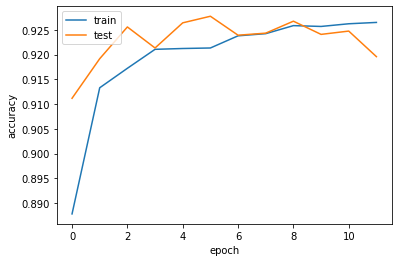

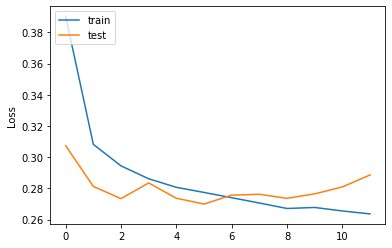

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Question 4:
from the plots we see that the train and test values match well. This seems that the model generalizes well. However, at the loss functions we see that the validation loss goes up at the end which could identify overfitting.


In [ ]:
loss, accuracy = model.evaluate(x_test_re, y_test_new, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.2916 - accuracy: 0.9206


### Question 5 and 6:
The accuracy is 0.92
The loss is 0.2916
According to the accuracy 1 in every 10 numbers is wrongly identified. So this model wouldn't be usefull, for example if a person writes their phonenumber which contains more 10 numbers, their phonenumber will be wrongly identified most of the time. 


### Question 7 - 9

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(256, input_shape=(784,), activation = 'relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [ ]:
fit_model2 = model2.fit(x_train_re, y_train_new, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 3s 7ms/step - loss: 0.3202 - accuracy: 0.9106 - val_loss: 0.1855 - val_accuracy: 0.9459
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.1458 - accuracy: 0.9578 - val_loss: 0.1283 - val_accuracy: 0.9615
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0994 - accuracy: 0.9707 - val_loss: 0.1076 - val_accuracy: 0.9676
Epoch 4/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0738 - accuracy: 0.9781 - val_loss: 0.0945 - val_accuracy: 0.9726
Epoch 5/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0566 - accuracy: 0.9834 - val_loss: 0.0862 - val_accuracy: 0.9737
Epoch 6/12
375/375 [==============================] - 5s 14ms/step - loss: 0.0453 - accuracy: 0.9869 - val_loss: 0.0786 - val_accuracy: 0.9758
Epoch 7/12
375/375 [==============================] - 6s 15ms/step - loss: 0.0359 - accuracy: 0.9896 - val_loss: 0.0831 - val_accuracy: 0.9753
Epoc

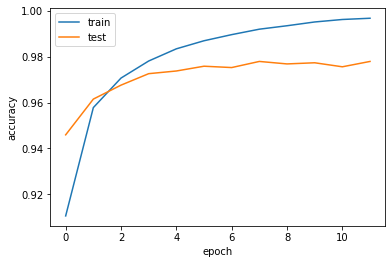

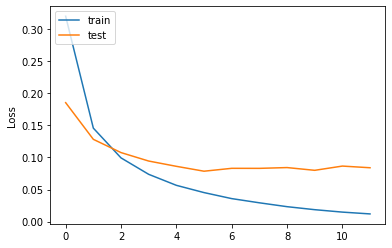

In [ ]:
plt.plot(fit_model2.history['accuracy'])
plt.plot(fit_model2.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit_model2.history['loss'])
plt.plot(fit_model2.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The validation and test results differ more from each other than in the first model. This means the model is less general. However the loss of the test is lower than in the first model.

## Deep convolutional networks

In [ ]:
x_train_2 = x_train.reshape(60000, 28, 28, 1) / 255
x_test_2 = x_test.reshape(10000, 28, 28, 1) / 255

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

In [ ]:
fit3 =  model.fit(x_train_2, y_train_new, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 10s 24ms/step - loss: 0.2129 - accuracy: 0.9341 - val_loss: 0.0796 - val_accuracy: 0.9758
Epoch 2/12
375/375 [==============================] - 9s 24ms/step - loss: 0.0521 - accuracy: 0.9842 - val_loss: 0.0484 - val_accuracy: 0.9864
Epoch 3/12
375/375 [==============================] - 65s 173ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0455 - val_accuracy: 0.9862
Epoch 4/12
375/375 [==============================] - 6s 15ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0453 - val_accuracy: 0.9867
Epoch 5/12
375/375 [==============================] - 5s 14ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0463 - val_accuracy: 0.9875
Epoch 6/12
375/375 [==============================] - 5s 14ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0465 - val_accuracy: 0.9892
Epoch 7/12
375/375 [==============================] - 5s 14ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.0461 - val_accuracy: 0.9

### Question 10

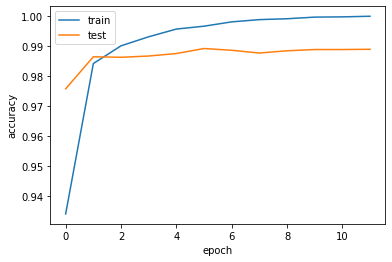

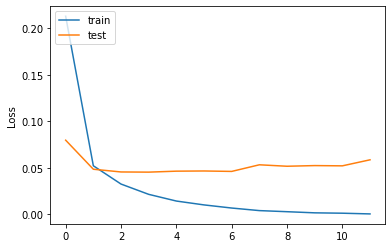

In [ ]:
plt.plot(fit3.history['accuracy'])
plt.plot(fit3.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit3.history['loss'])
plt.plot(fit3.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Question 11

The loss is decreased and the accuracy is increased.

### Question 12


In [ ]:
fit3.history['accuracy']

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.025))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.add(keras.layers.Dropout(rate=0.05))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

In [ ]:
fit4 =  model.fit(x_train_2, y_train_new, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 6s 16ms/step - loss: 1.0100 - accuracy: 0.8845 - val_loss: 0.0639 - val_accuracy: 0.9815
Epoch 2/12
375/375 [==============================] - 6s 15ms/step - loss: 0.8682 - accuracy: 0.9339 - val_loss: 0.0538 - val_accuracy: 0.9854
Epoch 3/12
375/375 [==============================] - 6s 15ms/step - loss: 0.8464 - accuracy: 0.9393 - val_loss: 0.0487 - val_accuracy: 0.9856
Epoch 4/12
375/375 [==============================] - 6s 15ms/step - loss: 0.8290 - accuracy: 0.9430 - val_loss: 0.0390 - val_accuracy: 0.9891
Epoch 5/12
375/375 [==============================] - 6s 15ms/step - loss: 0.8169 - accuracy: 0.9454 - val_loss: 0.0387 - val_accuracy: 0.9889
Epoch 6/12
375/375 [==============================] - 6s 16ms/step - loss: 0.8236 - accuracy: 0.9462 - val_loss: 0.0415 - val_accuracy: 0.9887
Epoch 7/12
375/375 [==============================] - 6s 15ms/step - loss: 0.7738 - accuracy: 0.9503 - val_loss: 0.0408 - val_accuracy: 0.9887

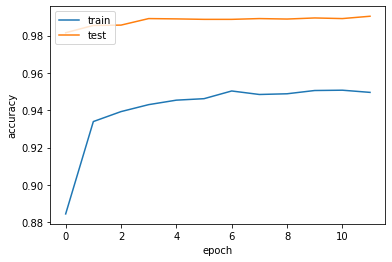

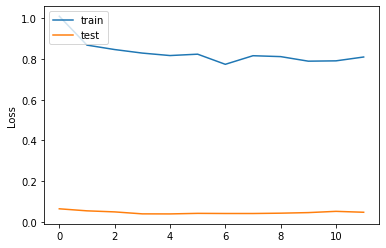

In [ ]:
plt.plot(fit4.history['accuracy'])
plt.plot(fit4.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit4.history['loss'])
plt.plot(fit4.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()